<h1>Shane Mulligan C00219013</h1>
__________________________________________________________________________________________________________________

<h1>Introduction:</h1>

This tutorial is created for the incoming 4th year software development students to understand how to work with machine learning algorithms using this tutorial as a guide. We will work through the whole process from setting up the environment to working with the data set and performing machine learning on the dataset. I will go through each step as simply as possible to make it understandable to any one who might struggle with this type of technology.

In this tutorial we are going to predict the Particle matter of size 10 micrometers in the city of Seoul in South Korea.  The result of this tutorial could possibly be used to present to the South Korean government if you so wanted to make them aware of the pollution problem in the area's of Seoul and surrounding area's.

<h1>
_____________________________________________________________
</h1>

<h1>Learning Outcomes</h1>

Following completion of this tutorial, you will have a better grasp of the following with the help of the Scikit-Learn framework,

-Data Import

-Data Processing

-Model Creation

-Model Training

-Model Testing

-Model Predictions

This tutorial will be done using a variety of packages but the main framework will be Scikit-Learn and all its functions.

<h1>_____________________________________________________________

<h1>Exclaimer</h1>

I will create this tutorial will ease on your device in mind, not everyone has a device that will be capable of performing large amounts of processing all at once, so I will take this into account.

<h1>_________________________________________________________

<h1>References</h1>

https://www.youtube.com/watch?v=0Lt9w-BxKFQ

https://pathmind.com/wiki/neural-network

https://www.ritchieng.com/pandas-changing-datatype/

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

https://en.wikipedia.org/wiki/Data_binning

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

<h1>___________________________________________________________

<h1>Setting up Jupyter Notebook:</h1>

If you do not have jupyter notebook already installed then follow these videos as a guide to setting it up.

For Windows: https://www.youtube.com/watch?v=otmWEEFysms

For Ubuntu: https://www.youtube.com/watch?v=eY4JFm74oi4&t=8s

For Mac: https://www.youtube.com/watch?v=daVgEXjv6DE

<h1>____________________________________________________________

<h1>Neural networks:</h1>

In this tutorial I will be using neural networks as the machine learning algorithm. I chose neural networks as they are great for a number of different projects. With my tutorial i will be using it to help get the air pollution based off locatiom in seoul in south korea. 

They are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input.  Works best with numerical data contained in vectors which will be useful to us as, we will be working with the air pollution numbers given to us from the data set.

For a more detailed explanation of Neural Networks click on the link below:

https://www.youtube.com/watch?v=aircAruvnKk

<h1>_________________________________________________________

<h1>Data Set:</h1>

The data set that we will be using in this tutorial will be the information gathered on air pollution in seoul in south korea over a number of years.

https://www.kaggle.com/bappekim/air-pollution-in-seoul/data

The data was gathered between the period of 2017 and 2019

It gathers information based on how well the instrumentation used was working and checks for a number of different pollutanats.

<h1>__________________________________________________________

<h1>Setting the Imports:</h1>

Initially we will start installing the dependencies and imports needed to carry out this project.

<h3>Pandas:</h3>

will be used as dataframes for our tutorial as it is great for searching through collumns and rows and makes it easier to view.
To install pandas enter this command into your terminal - sudo pip install pandas

<h3>Seaborn:</h3>

Is used to sit on top of matplotlib graphs and create a visaully appealing graph.
To install seaborn enter this command - sudo pip install seaborn

<h3>Scikit-Learn:</h3>

This is the library that contains all the machinelearning algorithms and functions for classifying the data.
To install just enter the command - sudo pip install scikit-learn

scikit learn has a lot of features some of which we will be using is: neural networks as the actual algorithm, then will be performing the confusion matrix onto the resulting classification, along with a classsification report. For the preproccessing we will use standard scaler and then with model selection we will be using train_test_split.

So then we will import all these into our notebook as follows

<h1>______________________________________________________________

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScalar
from sklearn.model_selection import train_test_split
%matplotlib inline

<h1>____________________________________________________________

<h1>Dataset Preprocessing</h1>

The line below is where we are loading in our dataset into the notebook and assigning it a variable air, that will make it easier to type rather that measurement_summary.

You can then go on to drop the 'Measurement date' and 'Address' from the set as they wont be able to help us with what we are trying to predict the PM10.

Then with the function .head() we can display the first 5 rows to show what exactly is in the data set and what we can do with it.


In [2]:
air = pd.read_csv('Measurement_summary.csv',sep=',')

In [3]:
air = air.drop(['Measurement date','Address'], axis=1)

In [4]:
air.head()

Station code   Latitude   Longitude    SO2    NO2     O3   CO  PM10  PM2.5
0           101  37.572016  127.005007  0.004  0.059  0.002  1.2  73.0   57.0
1           101  37.572016  127.005007  0.004  0.058  0.002  1.2  71.0   59.0
2           101  37.572016  127.005007  0.004  0.056  0.002  1.2  70.0   59.0
3           101  37.572016  127.005007  0.004  0.056  0.002  1.2  70.0   58.0
4           101  37.572016  127.005007  0.003  0.051  0.002  1.2  69.0   61.0

<h1>____________________________________________________________</h1>

Below we will try to change the data types of the fields to something much easier and more friendly to work with the neural network later.

ms will be the new variable to represent the dataset. Firstly we go through the air set to seek out any integers with the astype(int) and then we go on to change all of these to int16 data type as this makes creating a prediction easier later in the tutorial.

In [5]:
ms = air.fillna(0).astype(int)
ms = ms.astype('int16')
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 9 columns):
Station code    647511 non-null int16
Latitude        647511 non-null int16
Longitude       647511 non-null int16
SO2             647511 non-null int16
NO2             647511 non-null int16
O3              647511 non-null int16
CO              647511 non-null int16
PM10            647511 non-null int16
PM2.5           647511 non-null int16
dtypes: int16(9)
memory usage: 11.1 MB


<h1>________________________________________________________

Next we are moving on to finding the quality with regards Particle matter of 10 micrometers or 'PM10. Particle Matter of 10 micrometers, refers to any particles in the air typically of the size 10 micrometers. 

Firstly we want to know if any of the fields have any bad value in them, a bad value would be considered a null value or a field that has a character and not an integer in its place.  These bad values would all lead to have an in accurate score at the end will not give the right prediction.

I went first by checking the first 10 rows using ms.head() function, to just get the first 10, you can sub in 10 into the brackets, or any number you like and it will return that amount of fields, but if no value is put in the brackets it returns the top 5. 

By using this function 'ms['PM10'].value_counts()' you can get an exact count of all the different types of values throughout the whole dataset.  This will help in finding any outliers in the data, and you can see any bad data.

Now I wanted to find the min and max values of all the 'PM10' column, I did this as i wanted to put the values into bins to be high and low values which will make it easier to get a result and make it easier on computer with weak processing power to get a prediction. The bins I set had the max value being 3586 being too high for the air and the low value was -1, so I set the divider to be 260 as it was a resonable score to work with.  Then i relabled the column with the label encoder with the new values of 0 or 1.

Then when we have this done we can then proceed to plot this particle matter 10 into an easy to read graph to see the exact extent of the air pollution.

In [6]:
ms.head(10)

Station code  Latitude  Longitude  SO2  NO2  O3  CO  PM10  PM2.5
0           101        37        127    0    0   0   1    73     57
1           101        37        127    0    0   0   1    71     59
2           101        37        127    0    0   0   1    70     59
3           101        37        127    0    0   0   1    70     58
4           101        37        127    0    0   0   1    69     61
5           101        37        127    0    0   0   1    70     61
6           101        37        127    0    0   0   1    66     57
7           101        37        127    0    0   0   1    71     60
8           101        37        127    0    0   0   1    72     60
9           101        37        127    0    0   0   1    74     63

In [7]:
#Runnig this will show just how many fields are good and bad in a simple count.
ms['PM10'].value_counts()

27      13624
28      12864
26      12814
29      12757
30      12739
24      12538
32      12516
31      12453
25      12264
33      12100
23      12089
22      12023
34      11996
35      11671
21      11666
38      11535
36      11523
20      11306
37      11030
19      10747
39      10533
18      10424
17      10380
40      10269
41       9700
42       9643
16       9248
43       9171
44       8922
15       8732
        ...  
369         1
594         1
370         1
593         1
3442        1
3445        1
669         1
3293        1
358         1
608         1
2843        1
3416        1
346         1
347         1
622         1
2722        1
3180        1
3421        1
349         1
313         1
3377        1
3300        1
2913        1
3425        1
691         1
2776        1
305         1
356         1
3429        1
3228        1
Name: PM10, Length: 551, dtype: int64

In [48]:
ms['PM10'].unique()

array([1, 2, 0])

In [29]:
ms.max(axis=0)['PM10']

3586

In [30]:
ms.min(axis=0)['PM10']

-1

In [31]:
bins = (-1, 260, 3586)
group_names = ['high', 'low']
ms['PM10'] = pd.cut(ms['PM10'], bins = bins, labels = group_names)
ms['PM10'].unique()

[high, low, NaN]
Categories (2, object): [high < low]

In [32]:
label_quality = LabelEncoder()

In [33]:

ms['PM10'] = label_quality.fit_transform(ms['PM10'])

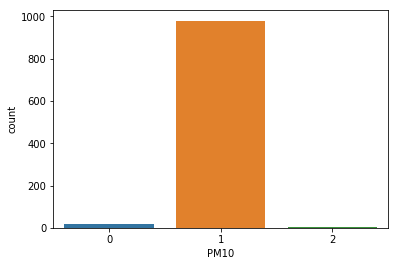

In [47]:
sns.countplot(ms['PM10'].head(1000))

<h1>___________________________________________________________

<h1>Training and Testing a Model</h1>

In this section we want to get the prediction and accuracy score of any predictions.  To do this we need to first start by splitting up both a test set of data and a training set of data.

Below I started by setting the X and Y values for the test and trains set.  The X will be populated the whole table and its values minus the ones we wish to drop.  In this case I decided to drop the 'PM10' as its the value we want to predict, 'SO2' will be dropped as when we converted the data type it left all the values as 0, this is the same for the columns 'NO2','O3'and 'CO'.  The Y axis will be only the values of 'PM10' and this will be what we want to predict against the rest of the table of data.

Then it is moved to having the X_train, X_test, y_train and y_test split into their sizes and respected values for the calculation with the algorithm.  The test_size states that 10% of the data will be used for both the test and training of the model.

Then we can use the function 'X_train[:10]' to view exactly what the X_train set is made up off and make sure it is correct.  We can also do this with the y_train for the same reason, we can spot any errors in the set and change it to suit what we need.

In [36]:
X = ms.drop(['PM10','SO2','NO2','O3','CO'], axis=1)
y = ms['PM10']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [38]:
X_train[:10]

Station code  Latitude  Longitude  PM2.5
642544           125        37        127     33
37062            102        37        126     11
335548           113        37        127      6
251112           110        37        127     30
507481           120        37        126     13
607504           124        37        127     25
563912           122        37        126     63
350368           114        37        127     48
195213           108        37        127     22
533320           121        37        126     20

In [39]:
y_train[:10]

642544    1
37062     1
335548    1
251112    1
507481    1
607504    1
563912    1
350368    1
195213    1
533320    1
Name: PM10, dtype: int64

<h1>_____________________________________________________________

<h1>Performing the Prediction</h1>

To begin with we use the standard  scalar to scale any data based around the value 0 with a standard deviation of 1.  The standard deviation is calculated and now the data will be scaled around that figure.

The fit_transform will take the newly scaled values and fit them to the respected place and transform the the set they are assigned to, in this case it is transforming the X_train to suit.

Then for the X_test, it is also transforming the values in it to be based on what was scaled.

The neural network algorithm will now be performed on the train and test to make a prediction and produce an accuracy score.  The MLPClassifier will firstly set the hidden layer sizes, a hidden layer is the layer between the input and output of the algorithm, it will show the prediction.  I have set the hidden layers to the standard size 11 for this as it will work good in this case.

The Max_iter, refers to the maximum number of epochs you want the model get trained on.  in simple terms a representation of the set, so it go through 10 iterations of different representations so it gives an accurate score.

Then the function 'mlpc_fit' will put together into a model the X_train and y_train so it can be used in the prediction.  Then it moves onto the mlpc_predict which is the neural networks function for predicting the value based of the test data that was provided to it.

<h3>Printing the Results</h3>

Now that we have performed the calculation we can now print out the results to see what score we managed to get from the algorithm.  We first want to see the classification report as this will show a detailed view of our accuracy in percentage.  The precision shows the general percision when performing that individual task, f1_score tells us the percentage of accuracy based of a positive result.

The confusion matrix gives us an overall summary of the results we have arrived at. A rough indication as to what exactly came out right in the prediction.

Then finally we can display the accuracy score for the whole process, it will give us a percentage stating how well the prediction actually performed and will it be useful.

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/seanoc/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int16 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc= mlpc.predict(X_test)

In [44]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))
print(accuracy_score(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       391
           1       1.00      1.00      1.00     64179
           2       0.57      0.02      0.04       182

   micro avg       1.00      1.00      1.00     64752
   macro avg       0.84      0.66      0.66     64752
weighted avg       1.00      1.00      1.00     64752

[[  371    20     0]
 [   18 64158     3]
 [    0   178     4]]
0.9966178650852483


<h1>______________________________________________________________

<h1>Conclusion</h1>

After completing this tutorial you should now have the basic skills to work off when it comes to preprocessing the data, plotting your graphs for better visualization and creating and using a model with the help of the algorithm neural networks.  You can see from our results that we are getting very high score with regard our accuracy score and classification report, this can be because of a number of reasons, we managed to get the data processed so well that it was capable to returning a positive prediction almost always or the fact that the data that was entered was biased.  In this case the data looks to be biased based of the fact the bins were displaying most of the values to be high.  If you wanted you can now go back and play around with the values and see what sort of results you get as this will help you to understand more.  From this tutorial we were able to predict the values of Particle Matter of 10 micrometers in the air in the South Korean city of Seoul with an accuracy score of 99.6%.

Now that you have completed this tutorial with Particle matter of 10 micrometers, you should now have the knowledge to complete your own version to get a result for the Particle matter of 2.5 micrometers all on your own and this will aid in your learning overall.  <h3>Best of Luck!!